# <center>Predicting House Sale Prices<center>
### <center>[Description of the Ames Housing dataset](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt)<center>
#### <center>[~ADD DATA DOWNLOAD LINK~]()<center>
##### <center>Austin Welch<center>

<img src="ames_img/PropertyValue.jpg">

##### Top resources used:
- https://www.dataquest.io/m/240/guided-project-predicting-house-sale-prices
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques#tutorials
    - https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
    - https://www.kaggle.com/dgawlik/house-prices-eda
    - https://www.kaggle.com/apapiu/regularized-linear-models
    - https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset    
- https://stats.stackexchange.com
- https://stackoverflow.com
- [Python Machine Learning](https://www.amazon.com/Python-Machine-Learning-Sebastian-Raschka/dp/1783555130)
- [The Elements of Statistical Learning](elements of statistical learning amazon)


##### Contents:
- Look at list 
- 
- 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Manually sorting features by type:

In [2]:
useless_features = ['Order','PID']

# regular continous numbers
contin_num_cols = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
                   'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', 
                   '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 
                   'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
                   'Screen Porch', 'Pool Area', 'Misc Val']

# these are discrete
discrete_num_cols = ['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 
                     'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Bedroom AbvGr', 
                     'Kitchen AbvGr',]

# these are interval
ordinal_num_cols = ['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
                    'Garage Yr Blt', 'Mo Sold', 'Yr Sold']

# nominal (class numbers)
categorical_num_cols = ['MS SubClass']


# have to give ordinal strings custom mappings
ordinal_string_cols = ['Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
                       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 
                       'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 
                       'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 
                       'Paved Drive', 'Pool QC', 'Fence']

# nominal (class) strings
categorical_string_cols = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 
                           'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 
                           'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
                           'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 
                           'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
                           'Sale Type', 'Sale Condition']

# dependent variable
target = ['SalePrice']

#### Also need to determine which features have possible values of "NA", because "NA" seems to be used to indicate both missing values as well as actual values for particular ordinal string columns

In [3]:
# columns where "NA" is an actual possible value rather than a missing value
cols_with_legit_NA = ["Bsmt Cond", "Bsmt Qual", "Garage Cond", "Garage Qual", 
                     "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Garage Finish"]

### Read in data, parsing twice
#### one ignoring "NA", one converting "NA" to "NaN"

In [4]:
# read in data features with legitimate "NA" values
legit_df = pd.read_table('data/AmesHousing.txt', delimiter="\t", usecols=cols_with_legit_NA, 
                     keep_default_na=False)

# add features that don't have possible "NA" values, so "NA" is replaced with "NaN"
data = pd.read_table('data/AmesHousing.txt', delimiter="\t").assign(**legit_df)

# replace empty strings with NaNs
data.replace('', np.NaN, inplace=True)

# print head of df
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# Make sure NA is a possible value
print(list(data[cols_with_legit_NA[0]].value_counts().index))

# Make sure sum of NaNs is not zero
print("Sum of NaN counts for each feature: ", data.isnull().sum().sum())

['TA', 'Gd', 'Fa', 'NA', 'Po', 'Ex']
Sum of NaN counts for each feature:  13129


### Remove outliers according to dataset description

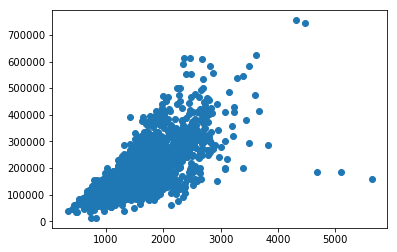

number of outliers:  5
number of samples BEFORE removing outliers:  2930
number of samples AFTER removing outliers:  2925


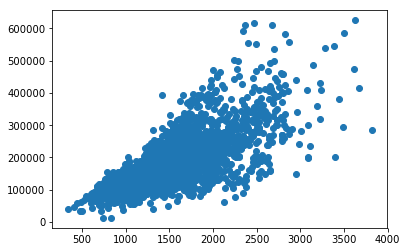

In [6]:
# outliers from dataset description
# (three are true outliers, two are just unusual sales (very large houses))
# description recommends dropping houses with more then 4000 sqft
plt.scatter(data["Gr Liv Area"], data["SalePrice"])
plt.show()
outliers = data[data['Gr Liv Area'] > 4000]
print("number of outliers: ", outliers.shape[0])

# drop the outliers
print("number of samples BEFORE removing outliers: ", data.shape[0])
data = data[data["Gr Liv Area"] < 4000]
print("number of samples AFTER removing outliers: ", data.shape[0])
plt.scatter(data["Gr Liv Area"], data["SalePrice"])
plt.show()

## Cleaning The Data

### Data cleaning function:
- check that lists of features were written correctly (in data.columns)
- get lists of numeric and string (object) types
- type check manually created feature lists against generated type lists
    - possibly do type conversion
- drop rows for features with less than 10 missing values (as long as this isn't too much data)
- drop unimportant features
- drop features with more than 25% missing data
- impute features with more than 25% missing
    - mean for continuous features
    - median for discrete features
    - mode for string features
- recheck missing counts
- return new dataframe and list of dropped features

In [11]:
def clean_data(df, target, drop_list=[], contNum=[],discNum=[],ordNum=[],
                       catNum=[], ordStr=[],catStr=[]):
    # make copy of data
    temp = df.copy() 
    # get shape
    n_samples, n_features = temp.shape
    # print original shape
    print('Originally, %d samples and %d features' % (n_samples, n_features))
    # list of original features
    orig_features = list(temp.columns)
    
    # check number of rows with at least one missing value ( == n_samples in this case)
    rows_with_missing = temp.isnull().any(axis=1).sum()    
    
    # Check that all members of each list are actually in the data
    all_lists = [target, drop_list, contNum, discNum, ordNum, catNum, ordStr, catStr]
    for l in all_lists:
        for f in l:
            if f not in temp.columns:
                raise Exception("feature '%s' in list '%s' does not exist in data" % (f,l))
    
    # filter numeric and string types
    numeric_cols = list(temp.select_dtypes(['float', 'int']).columns)
    string_cols = list(temp.select_dtypes(['object']).columns)

    # make sure types are what they're expected to be, convert types if not
    for f in (numeric_cols):
        if f not in (contNum+discNum+ordNum+catNum+drop_list+target):
            print("warning: feature '%s' not a float or int by default..converting." % (f))
            try:
                temp[f] = temp[f].astype('float64')
            except:
                print("Error converting type (float)!")
    for f in (string_cols):
        if f not in (ordStr+catStr+drop_list+target):
            print("warning: feature '%s' not a string by default..converting." % (f))
            try:
                temp[f] = temp[f].astype('object')
            except:
                print("Error converting type (string)!")
    
    # drop rows with less than 10 missing if that accounts for less than 2% of samples
    null_counts = temp.isnull().sum()
    less_than_10 = list(null_counts[(null_counts < 10) & (null_counts > 0)].index)
    rows_less10_count = temp[less_than_10].isnull().any(axis=1).sum()
    if rows_less10_count < (n_samples * .02):
        rows_less10_indices = list(temp[temp[less_than_10].isnull().any(axis=1)].index)
        temp.drop(rows_less10_indices, axis=0, inplace=True)
        print("shape after row drops: ", temp.shape)
    
    # drop unimportant features like sample number, etc. 
    temp.drop(drop_list, axis=1, inplace=True)    
    print("shape after unimportant features dropped: ", temp.shape)
    
    # drop features with more than 25% missing and drop rows with less than 10 missing
    too_many_missing = list(null_counts[null_counts > round(.25*n_samples)].index)
    temp.drop(too_many_missing, axis=1, inplace=True)
    print("shape after dropping features with more than 25% missing: ", temp.shape)

    # impute features with more than 25% missing
    # impute continuous values with mean
    floats = list(temp.select_dtypes(['float']).columns)
    for f in floats:
        temp[f] = temp[f].fillna(temp[f].mean())
    # impute discrete values with median
    ints = list(temp.select_dtypes(['int']).columns)    
    for f in ints:
        temp[f] = temp[f].fillna(temp[f].median())
    # impute strings with mode
    strings = list(temp.select_dtypes(['object']).columns)
    for f in strings:
        temp[f] = temp[f].fillna(temp[f].mode()[0]) 
    
    # recheck missing counts
    print("Total features with missing values now: ", temp.isnull().sum().sum())
    print("final shape: ", temp.shape)
    
    final_dropped_features = list(set(orig_features) - set(temp.columns))
    print("All dropped features: ", final_dropped_features)
    print("(%d features dropped)" % (len(final_dropped_features)))
    
    return temp, final_dropped_features

In [12]:
dropped = []
data, dropped = clean_data(data, target, useless_features, contin_num_cols, discrete_num_cols,
                  ordinal_num_cols, categorical_num_cols, ordinal_string_cols,
                  categorical_string_cols)    

print(data.shape)
data.head()

Originally, 2925 samples and 82 features
shape after row drops:  (2916, 82)
shape after unimportant features dropped:  (2916, 80)
shape after dropping features with more than 25% missing:  (2916, 75)
Total features with missing values now:  0
final shape:  (2916, 75)
All dropped features:  ['Fireplace Qu', 'PID', 'Order', 'Fence', 'Misc Feature', 'Alley', 'Pool QC']
(7 features dropped)
(2916, 75)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


### Update feature lists

In [13]:
# for each feature list, remove values in dropped list
contin_num_cols = list(set(contin_num_cols) - set(dropped))
discrete_num_cols = list(set(discrete_num_cols) - set(dropped))
ordinal_num_cols = list(set(ordinal_num_cols) - set(dropped))
categorical_num_cols = list(set(categorical_num_cols) - set(dropped))
ordinal_string_cols = list(set(ordinal_string_cols) - set(dropped))
categorical_string_cols = list(set(categorical_string_cols) - set(dropped))

## Transforming Features

### Create custom mappings for ordinal string features

In [14]:
print(len(ordinal_string_cols))

# remove dropped features from ordinal_string_cols before creating mappings
ordinal_string_cols = sorted(list(set(ordinal_string_cols) - set(dropped)))

print(len(ordinal_string_cols))

for f in ordinal_string_cols:
    print('\n', f, '\n\n', data[f].value_counts(), '\n\n----------------------------------')

17
17

 Bsmt Cond 

 TA    2604
Gd     122
Fa     104
NA      78
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64 

----------------------------------

 Bsmt Exposure 

 No    1903
Av     417
Gd     280
Mn     238
NA      78
Name: Bsmt Exposure, dtype: int64 

----------------------------------

 Bsmt Qual 

 TA    1282
Gd    1213
Ex     253
Fa      88
NA      78
Po       2
Name: Bsmt Qual, dtype: int64 

----------------------------------

 BsmtFin Type 1 

 GLQ    853
Unf    847
ALQ    428
Rec    287
BLQ    269
LwQ    154
NA      78
Name: BsmtFin Type 1, dtype: int64 

----------------------------------

 BsmtFin Type 2 

 Unf    2488
Rec     106
LwQ      89
NA       78
BLQ      68
ALQ      53
GLQ      34
Name: BsmtFin Type 2, dtype: int64 

----------------------------------

 Electrical 

 SBrkr    2670
FuseA     187
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64 

----------------------------------

 Exter Cond 

 TA    2535
Gd     299
Fa      67
Ex   

In [15]:
# need a list of dictionaries, one for each ordinal string mapping

# each mapping:

# Exter Cond, Exter Qual, Heating QC, Kitchen Qual
Po_Fa_TA_Gd_Ex = {"Po":"0", "Fa":"1", "TA":"2", "Gd":"3", "Ex":"4"}

# Bsmt Cond, Bsmt Qual, Garage Cond, Garage Qual
NA_Po_Fa_TA_Gd_Ex = {"NA":"0", "Po":"1", "Fa":"2", "TA":"3", "Gd":"4", "Ex":"5"}

# Bsmt Exposure
NA_No_Mn_Av_Gd = {"NA":"0", "No":"1", "Mn":"2", "Av":"3", "Gd":"4"}

# BsmtFin Type 1, BsmtFin Type 2
NA_Unf_LwQ_Rec_BLQ_ALQ_GLQ = {"NA":"0", "Unf":"1", "LwQ":"2", "Rec":"3", "BLQ":"4", "ALQ":"5", "GLQ":"6"}
# Electrical
Mix_FuseP_FuseF_FuseA_SBrkr = {"Mix":"0", "FuseP":"1", "FuseF":"2", "FuseA":"3", "SBrkr":"4"}

# Functional
Sal_Sev_Maj2_Maj1_Mod_Min2_Min1_Typ = {"Sal":"0", "Sev":"1", "Maj2":"2", "Maj1":"3", "Mod":"4", 
                                       "Min2":"5", "Min1":"6", "Typ":"7"}

# Garage Finish
NA_Unf_RFn_Fin = {"NA":"0", "Unf":"1", "RFn":"2", "Fin":"3"}

# Land Slope
Sev_Mod_Gtl = {"Sev":"0", "Mod":"1", "Gtl":"2"}

# Paved Drive
N_P_Y = {"N":"0", "P":"1", "Y":"2"}

# Utilities
ELO_NoSeWa_NoSewr_AllPub = {"ELO":"0", "NoSeWa":"1", "NoSewr":"2", "AllPub":"3"}

# list of mapping dicts
mappings = [Po_Fa_TA_Gd_Ex, NA_Po_Fa_TA_Gd_Ex, NA_No_Mn_Av_Gd, NA_Unf_LwQ_Rec_BLQ_ALQ_GLQ,
           Mix_FuseP_FuseF_FuseA_SBrkr, Sal_Sev_Maj2_Maj1_Mod_Min2_Min1_Typ, 
           NA_Unf_RFn_Fin, Sev_Mod_Gtl, N_P_Y, ELO_NoSeWa_NoSewr_AllPub]

mappings = {
    "Exter Cond":Po_Fa_TA_Gd_Ex,
    "Exter Qual":Po_Fa_TA_Gd_Ex,
    "Heating QC":Po_Fa_TA_Gd_Ex,
    "Kitchen Qual":Po_Fa_TA_Gd_Ex,
    "Bsmt Cond":NA_Po_Fa_TA_Gd_Ex,
    "Bsmt Qual":NA_Po_Fa_TA_Gd_Ex,
    "Garage Cond":NA_Po_Fa_TA_Gd_Ex,
    "Garage Qual":NA_Po_Fa_TA_Gd_Ex,
    "Bsmt Exposure":NA_No_Mn_Av_Gd,
    "BsmtFin Type 1":NA_Unf_LwQ_Rec_BLQ_ALQ_GLQ,
    "BsmtFin Type 2":NA_Unf_LwQ_Rec_BLQ_ALQ_GLQ,
    "Electrical":Mix_FuseP_FuseF_FuseA_SBrkr,
    "Functional":Sal_Sev_Maj2_Maj1_Mod_Min2_Min1_Typ,
    "Garage Finish":NA_Unf_RFn_Fin,
    "Land Slope":Sev_Mod_Gtl,
    "Paved Drive":N_P_Y,
    "Utilities":ELO_NoSeWa_NoSewr_AllPub
}

### Feature transformation function:
- map ordinal string features to floats
- convert categorical features to dummy columns
- check types
- get list of binary/non-binary features (in case I want to filter this way later)
- standardize features
- get list of top 10 features using SelectKBest & f_regression  
- return X, y, ten_best_features

In [57]:
# Now I need to transform features
def transform_features(df, target, dropped=[], mappings={}, contNum=[], discNum=[], ordNum=[],
                       catNum=[], ordStr=[], catStr=[]):
    # make copy of data
    temp2 = df.copy() 
    # get shape
    n_samples, n_features = temp2.shape
    print('original shape: ', temp2.shape)
       
    # map ordinal string features to floats
    for f in mappings.keys():
        #print(f, '\n')
        #print(temp2[f].value_counts())
        temp2[f] = temp2[f].replace(mappings[f]).astype('float64') # added .astype later
        #print(temp2[f].value_counts(), '\n\n-------------------------')

    # convert catNum, catStr to dummy columns    
    dummy_cols = pd.get_dummies(temp2[catNum+catStr]).astype('float64')    
    temp2.drop(catNum+catStr, axis=1, inplace=True)
    temp2 = pd.concat([temp2, dummy_cols], axis=1)
    print("shape after dummy columns added: ", temp2.shape)
    
    # make sure types are all what I want
    num_cols = temp2.select_dtypes(['uint8', 'int', 'float']).columns
    str_cols = temp2.select_dtypes(['object']).columns

    if (len(num_cols)+len(str_cols) == temp2.shape[1]):
        temp2[num_cols] = temp2[num_cols].astype('float64')
        
    # Check that all features are now float64
    float64_cols = list(temp2.select_dtypes(['float64']).columns)
    print("All features now float64?: ", len(float64_cols) == temp2.shape[1])    
    
    # CHANGE FROM >DATA<
    
    # list of binary features
    binary_features = data.columns[(data.max()==1) & (data.min()==0)].tolist()
    len(binary_features)
    
    # list on non-binary features
    nonbinary_features = list(set(data.columns.tolist()) - set(binary_features))
    
    # separate X,y
    X = temp2.drop(['SalePrice'], axis=1)
    y = temp2["SalePrice"]
    
    

    # OTHER TRANSFORMATIONS??
    
    
    
    # Standardize features
    from sklearn.preprocessing import StandardScaler
    X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns.tolist())
    
    
    # feature selection example
    from sklearn.feature_selection import SelectKBest, f_regression    
    kbest = SelectKBest(score_func=f_regression, k=10) 
    x_new = pd.DataFrame(kbest.fit_transform(X, y))
    #print('x_new shape: ', x_new.shape)
    ten_best_features = X.columns[kbest.get_support()].tolist()
    x_new.columns = ten_best_features
    #print(ten_best_features)    
    

    
    return X,y, ten_best_features

In [17]:
# possibilities:
#sklearn.preprocessing.MinMaxScaler()
#sklearn.preprocessing.Normalizer()
#sklearn.preprocessing.StandardScaler()
#sklearn.feature_selection.VarianceThreshold()


#correlations (linear relationship - could still be nonlinear)        
#corrs = np.abs(temp2.corr().SalePrice).sort_values(ascending=False)
#corrs.drop(target, inplace=True)
#print(corrs)

In [18]:
# probably a good idea to rewrite as object oriented with .fit_transform() method    
# possibly rename this to clean and create another function for transforming??

# run transformation function  
X, y, ten_best_features = transform_features(data, target, dropped, mappings, contin_num_cols, discrete_num_cols, 
                          ordinal_num_cols, categorical_num_cols, ordinal_string_cols, 
                          categorical_string_cols)

print("\n\n10 best features:\n", "\n".join(ten_best_features), sep="\n")

print("\n\ny.head(): ", y.head(), sep="\n")
print("\nX.head():")
X.head()

original shape:  (2916, 75)
shape after dummy columns added:  (2916, 221)
All features now float64?:  True


10 best features:

Overall Qual
Year Built
Exter Qual
Bsmt Qual
Total Bsmt SF
1st Flr SF
Gr Liv Area
Kitchen Qual
Garage Cars
Garage Area


y.head(): 
0    215000.0
1    105000.0
2    172000.0
3    244000.0
4    189900.0
Name: SalePrice, dtype: float64

X.head():


,Lot Frontage,Lot Area,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside
0,3.477160,2.792886,0.030254,0.216377,-0.063318,-0.506094,-0.373884,-1.160201,0.063866,-0.685515,...,-0.064282,-0.089164,-0.126601,0.460402,-0.300156,2.179789,-0.256495,-0.173276,-0.066919,-1.647619
1,0.531688,0.197084,0.030254,0.216377,-0.776193,0.393217,-0.340786,-1.112262,-0.574431,-0.685515,...,-0.064282,-0.089164,-0.126601,0.460402,-0.300156,-0.458760,-0.256495,-0.173276,-0.066919,0.606936
2,0.579974,0.537857,0.030254,0.216377,-0.063318,0.393217,-0.440080,-1.256081,0.041070,-0.685515,...,-0.064282,-0.089164,-0.126601,0.460402,-0.300156,2.179789,-0.256495,-0.173276,-0.066919,-1.647619
3,1.159412,0.137562,0.030254,0.216377,0.649558,-0.506094,-0.109101,-0.776684,-0.574431,1.045187,...,-0.064282,-0.089164,-0.126601,0.460402,-0.300156,2.179789,-0.256495,-0.173276,-0.066919,-1.647619
4,0.241970,0.481556,0.030254,0.216377,-0.776193,-0.506094,0.850739,0.661504,-0.574431,-0.685515,...,-0.064282,-0.089164,-0.126601,0.460402,-0.300156,-0.458760,-0.256495,-0.173276,-0.066919,0.606936


In [19]:
# double check null counts
print("X.isnull().sum().sum(): ", X.isnull().sum().sum())
print("y.isnull().sum(): ", y.isnull().sum())

X.isnull().sum().sum():  0
y.isnull().sum():  0


#### Other possible feature transformations:

- sklearn.preprocessing.PolynomialFeatures?
- normalize?
- scale?
- standardize?
- other transforms?
- combinations of features? ex. yearx-yeary
- drop low variance features
- get ordered list of correlation

- Which columns leak data about the final sale?
- Which columns are currently numerical but need to be encoded as categorical instead?
- What new features can we create, that better capture the information in some of the features?
    - An example of this would be the years_until_remod feature we created in the last mission.
- Research some other approaches to feature engineering online around housing data.

In [21]:
# must normalize before using VarianceThreshold
# (Since I standardized everything will have variance of 1)
variances = X.var()
pd.options.display.float_format = '{:20,.2f}'.format
variances

Lot Frontage                             1.00
Lot Area                                 1.00
Utilities                                1.00
Land Slope                               1.00
Overall Qual                             1.00
Overall Cond                             1.00
Year Built                               1.00
Year Remod/Add                           1.00
Mas Vnr Area                             1.00
Exter Qual                               1.00
Exter Cond                               1.00
Bsmt Qual                                1.00
Bsmt Cond                                1.00
Bsmt Exposure                            1.00
BsmtFin Type 1                           1.00
BsmtFin SF 1                             1.00
BsmtFin Type 2                           1.00
BsmtFin SF 2                             1.00
Bsmt Unf SF                              1.00
Total Bsmt SF                            1.00
Heating QC                               1.00
Electrical                        

### kde plot of the target variable (SalePrice)

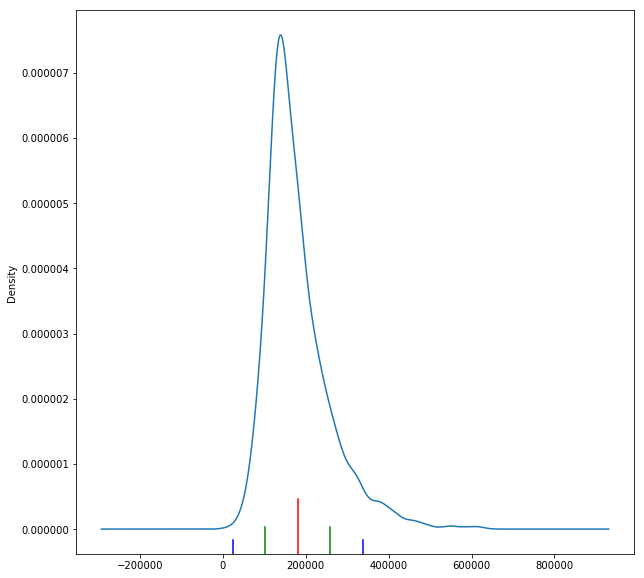

mean:  180367.50274348422
std:  78597.09350106676


In [22]:
sortedY = y.sort_values()

plt.figure(figsize=(10,10))
sortedY.plot.kde()
plt.axvline(sortedY.mean(), c='red', ymax=0.1)
plt.axvline(sortedY.mean()-sortedY.std(), c='green', ymax=0.05) # 68%
plt.axvline(sortedY.mean()+sortedY.std(), c='green', ymax=0.05)
plt.axvline(sortedY.mean()-2*sortedY.std(), c='blue', ymax=0.025) # 95%
plt.axvline(sortedY.mean()+2*sortedY.std(), c='blue', ymax=0.025)
plt.show()

print("mean: ", sortedY.mean())
print("std: ", sortedY.std())

# TESTING SOME MODELS
- To do:
    - pipeline
    - nested cross-validation
    - possibly add polynomial features    
  
    
- models to try:
    - LinearRegression
    - RidgeRegression
    - Lasso
    - ElasticNet
    - SVR(kernel='linear')
    - SVR(kernel='rbf')
    - AdaBoostRegressor
    - RandomForestRegressor
    - ExtraTreesRegressor
    - GradientBoostingRegressor
    - BaggingRegressor

### OTHER OPTIONS (probably try these!)
- neural network
- XGBRegressor

In [44]:
# estimators
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


# OTHER ESTIMATORS
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor



# definitely need
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# maybe need
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [55]:
# K-Fold cross-validators
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)


# estimators with built-in hyperparameter cross-validation
# using cross_val_score on a CV estimator object performs nested cross-validation
cv_names = ['RidgeCV', 'LassoCV', 'ElasticNetCV']
cv_classifiers = [
    RidgeCV(cv=3),
    LassoCV(cv=3),
    ElasticNetCV(cv=3),
]
cv_scores = {}


# all estimators (may need to use GridSearchCV for hyperparameter tuning)
all_names = ['LinearRegression', 'RidgeCV', 'LassoCV', 'ElasticNetCV', 'LinearSVR SVR', 
         'SVR (rbf)', 'AdaBoostRegressor', 'RandomForestRegressor', 'BaggingRegressor',
        'ExtraTreesRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'MLPRegressor']
all_classifiers = [
    LinearRegression(),
    RidgeCV(cv=3),
    LassoCV(cv=3),
    ElasticNetCV(cv=3),
    LinearSVR(),
    SVR(kernel='rbf'),
    AdaBoostRegressor(),
    RandomForestRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    MLPRegressor(max_iter=5000) # probably need to drop features before using this!
]
all_scores = {}

In [56]:
for name, regressor in zip(all_names, all_classifiers):
    all_scores[name] = cross_val_score(regressor, X, y, cv=cv_outer, scoring="neg_mean_absolute_error", verbose=0, n_jobs=-1)
    print(name, ": ", np.abs(np.mean(all_scores[name])))

LinearRegression :  2.26666270531e+13
RidgeCV :  16186.6856131
LassoCV :  15655.7163521
ElasticNetCV :  48369.2526161
LinearSVR SVR :  177958.809993
SVR (rbf) :  55690.244923
AdaBoostRegressor :  22946.7483615
RandomForestRegressor :  16327.6099544
BaggingRegressor :  16303.935684
ExtraTreesRegressor :  15660.5475314
GradientBoostingRegressor :  14009.3398826
XGBRegressor :  14113.3120683


/Users/austin/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/austin/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/austin/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/austin/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/austin/anaconda/l

MLPRegressor :  18405.6573094


### Best model so far looks like GradientBoostingRegressor

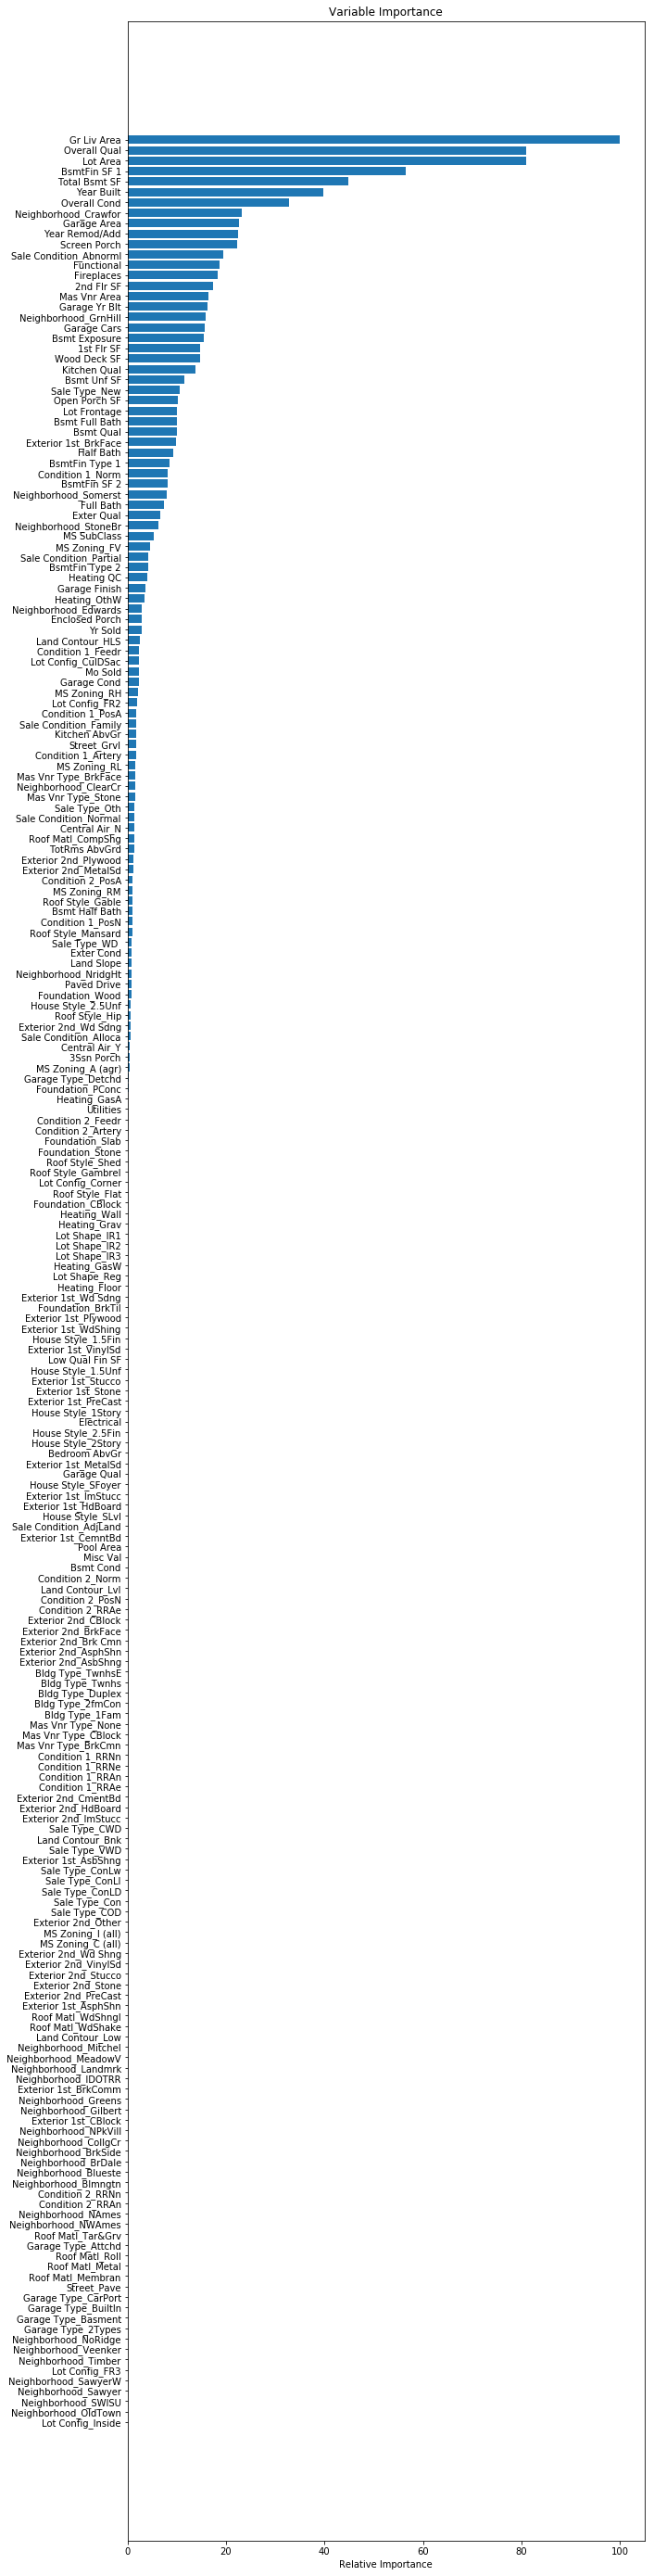

In [26]:
model = GradientBoostingRegressor().fit(X,y)

feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())


sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,50))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [42]:
zero_features = sorted_idx[feature_importance[sorted_idx] == 0]
zero_features

print("")
X.columns[zero_features].tolist()

['Lot Config_Inside', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Lot Config_FR3', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Neighborhood_NoRidge', 'Garage Type_2Types', 'Garage Type_Basment', 'Garage Type_BuiltIn', 'Garage Type_CarPort', 'Street_Pave', 'Roof Matl_Membran', 'Roof Matl_Metal', 'Roof Matl_Roll', 'Garage Type_Attchd', 'Roof Matl_Tar&Grv', 'Neighborhood_NWAmes', 'Neighborhood_NAmes', 'Condition 2_RRAn', 'Condition 2_RRNn', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_NPkVill', 'Exterior 1st_CBlock', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Exterior 1st_BrkComm', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Land Contour_Low', 'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Exterior 1st_AsphShn', 'Exterior 2nd_PreCast', 'Exterior 2nd_Stone', 'Exterior 2nd_Stucco', 'Exterior 2nd_Vin

========================================================================================

scoring options:
- scoring='neg_mean_squared_error'
- scoring='r2'
- scoring='neg_mean_absolute_error'

### [MAE vs. RMSE differences](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d):
Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. The three tables below show examples where MAE is steady and RMSE increases as the variance associated with the frequency distribution of error magnitudes also increases.

#### Conclusion
RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.


From an interpretation standpoint, MAE is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.


On the other hand, one distinct advantage of RMSE over MAE is that RMSE avoids the use of taking the absolute value, which is undesirable in many mathematical calculations (not discussed in this article, another time…).

In [27]:
print(y.max()-y.min())
print(y.std())

612211.0
78597.09350106672


# Possible changes from looking at other AmesHousing analyses (probably just do these on Kaggle set instead):



# DONE:

- **print summary/description of data (or at least SalePrice)**
- **Fix standardization** $\checkmark$
    - Standardization cannot be done before the partitioning, as we don't want to fit the StandardScaler on some observations that will later be used in the test set.
    - [Standardize numerical features](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- **detecting outliers without any info**
    - after standardizing data, can look at the outer low/high range for extreme values
- **Boxplots of categorical variables vs. sale price** (or barplots)
    - should show consistency with our common sense that neighborhood, zoning, house quality and facility might distinguish the house value. These help to confirm our understanding of what may affect a home’s sale price.
- **density plots for numeric features**
    - "Density plots of the features indicates that the features are skewed. The denisty plot for YearBuilt shows that the data set contains a mix of new and old houses. It shows a downturn in the number of houses in recent years, possibily due to the housing crisis."
- **highly correlated features**
    - good example in "2-Feature Selection"
    - even better example below
    - take a look at correlation matrix of features and possibly remove some highly correlated variables (but not necessarily)
    
    

# SKIP:

- **Normality tests**
    - normality assumption refers to residuals from the model, not the original data, so look closely at this
    - https://stats.stackexchange.com/questions/12053/what-should-i-check-for-normality-raw-data-or-residuals
    - scipy.stats.shapiro
    - can test all the quantitative variables at once, then probably transform them
- **remove low variance features**
    - look at the numeric features and remove those with near 0 variance because they offer little to no additional information
- **Calculate skewness and kurtosis for each variable** 
    - extreme values say the data is not normally distributed (greater than abs(3))
    
- **Remove all homes with a living area (GR LIVE AREA) above 1500 square feet.** The purpose to the second step is to alleviate problems with non-homogeneous variance. As might be expected there is increasing variation with increasing price within the Ames housing market. This problem can be remedied by taking a transformation (square root) of the sales price but those wishing to keep the response in dollars can simply use the smaller homes as they tend to show more homogeneous variation.
- **The following columns were chosen to be “excluded” from the dataset:**
    - Id, Street, Alley, PoolQC, Utilities, Condition2, RoofMatl, MiscVal, PoolArea, 3SsnPorch, LowQualFinSF, MiscFeature, LandSlope, Functional, BsmtHalfBath, ScreenPorch, BsmtFinSF2, EnclosedPorch.



# LEFT TO DO:










- **[Testing for the assumptions underlying the statistical bases for multivariate analysis](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)** (in "Getting hard core" section)
    - Normality
    - Homoscedasticity
    - Linearity
    - Absence of correlated errors
  
- **Spearman correlation**
    - Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear. 
- **Statistical feature selection**    
    - Not every feature in its current form is expected to contain predictive value to the model, and may mislead or add noise to the model. To filter these out we will perform a Pearson correlation to test all features against the response class (sales price) as a quick measure of their predictive strength, only picking the top X strongest features from this method, the remaining features will be left behind. This number can be tuned for further model performance increases.  


- **Skewness**
    - All numeric variables that had a skewness of over 0.75 were transformed using the log function
    
  
 - **More feature engineering**
    - Some columns that were originally dropped may become useful when combined with other features. For example try bucketing the years in which the house was built by decade   
    - Interaction terms
- **polynomial terms**
    - possibly add polynomial/quadratic terms for nonlinear features and/or top 10 features    
        
- **Feature importance plot**
    - example:
    <img src="http://2igww43ul7xe3nor5h2ah1yq.wpengine.netdna-cdn.com/wp-content/uploads/2016/09/pic5-1-1024x528.jpg">
    
- **Obtain std of cross-validated RMSE's** to see how stable the model is (ex. 12k std is very unstable)
- **bias-variance** 
    - bias: accuracy
    - variance: std of rmses

- **Construct normal probability plot for SalePrice**
    - Can also look at the plot of the residuals - if data is normally distributed the residuals should be normally distributed around each predicted score
    - should be NO DISCERNIBLE PATTERN IN THE RESIDUALS PLOT
    - stats.probplot
    


- **Clustering the data may also yeild some hidden insights**
    - good example in top link
- **[Time Series](http://blog.nycdatascience.com/student-works/advanced-regression-modeling-house-prices/)**
    - It’s important to note that the housing price data ranges from early-2006 to mid-2010. We should be aware that the subprime mortgage crisis happened during this period and contributed to the economic recession of December 2007 and June 2009. We drew the time series plot of monthly median house sale price below and decomposed the time series into trend and seasonality. As shown in the trend panel below, it’s obvious that the monthly median sale price had decreased steadily from early 2008 until late 2009.   That would indicate the house sales in Ames was no exception and was influenced by the mortgage crisis. We derived the trend index and seasonality index from the time series. Since the time series for sale price appears to follow a multiplicative way such that Sale Price = Trend * Seasonality * Cyclicality * Irregularity, we calculated the time series index:

    - TsIdx  =  TrendIdx * SeasonIdx / max(TrendIdx).

<img src="http://2igww43ul7xe3nor5h2ah1yq.wpengine.netdna-cdn.com/wp-content/uploads/2016/09/pic1-1.jpg">



- **Modeling approaches**
    - "We divided our modeling onto two sections. On the one side we modeled to achieve high predictive accuracy, and on the other side we modeled to maintain interpretation. We first discuss modeling that focused on achieving high predictive accuracy. As a first step we tuned parameters of all our base learners. We used grid-search to find the optimal parameters. 
- **[Stacking](https://stats.stackexchange.com/questions/18891/bagging-boosting-and-stacking-in-machine-learning)**     
- ### **Model Averaging** 
    - "Stacking did not give us the intended results, although it improved our score slightly and did put us in the top 20% of participants. We therefore decided to use model averaging. This is a simple strategy where you average out your predictions. Below is a simple visual representation. Seeing as this approach gave us significantly better results, we decided to include even more models into the averaging, placing more weight on the models we know performed well."
    <img src="http://2igww43ul7xe3nor5h2ah1yq.wpengine.netdna-cdn.com/wp-content/uploads/2016/09/Screen-Shot-2016-09-19-at-10.45.53-PM-576x402.png">

- **Plot predicted vals vs. residuals and predicted vals vs real vals**
    - for training and validation data (diff colors) and add a line

- **functionalize more code**
    - def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
- **Showing best picked features with regularization**
    - [2* Linear Regression with Ridge regularization (L2 penalty)](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- **h20 package**
    - h2o package which allows R to run in-memory, in distributed fashion. This sped up many models that I had already built by at least 20x running on my local machine. 
- **LASSO** seems to perform well on kaggle public leaderboard and is also easily interpretable. The LASSO is more reliant on the assumption that the explanatory variables are linearly related to the response.
- **[Keras](https://www.kaggle.com/apapiu/regularized-linear-models)**
    - Using TensorFlow backend
    - one hidden layer prob not enough for Keras, try 5 dense layers
- **save examples of useful plots for later**
    - like heatmap, correlated features, pairplots, etc
- **Deployment**
    - when best model is selected, retrain with 100% of the data and save the parameters
- ### **[SUBMIT TO KAGGLE!](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)**
    - also look at some public submissions
    - Metric:
        - Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

##### code for heatmaps:

heatmaps - can indicate a situation of multicollinearity

#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);



#saleprice correlation matrix (really good one to use)
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# reread list of things to do
## order them
## complete several

#### description
- summary
- dl link
- snippets from info page
- outline of what I'm going to accomplish
    - AmesHousing.txt vs. Kaggle
        - Descriptions for each
            - read in/missing info etc

### pipeline 1: accuracy
- uses AmesHousing.txt
- read in data
- clean data


### pipeline 2: interpretability
- uses AmesHousing.txt
- read in data
- clean data


### pipeline 3: kaggle
- Uses training, testing data









#### read in
- NA vs NaN


#### cleaning
- checking missing data
- dealing with nans
    - dropping 
        - updating lists
    - imputing
    - recheck missing
   
- grouping features by type
- checking data types
- converting data types if not proper default
- detecting outliers
- dropping outliers

#### transforming
- must come after 
- create custom mappings
- apply custom mappings
- dummy columns
- 
- 


- perform cross-validation the right way: include all training (feature selection, preprocessing, etc.) in each fold.
    - to help protect against overfitting to public leaderboard (small batch of whole test data)
    





#### exploration
- boxplots of categorical variables vs. sale price (or barplots)
- density plots for numeric features (for normality checks)
- skew and kurtosis of pairs
- normal probability plots of all vs. target
- heatmaps 
- correlations
- heatmap top correlations
- pairplot of top correlations
- 
- clustering


- how would this work if train/test were alrdy pre-separated
    - this assumes you dont need to clean missing vals in test set (but check anyway)
    - create function:
        - train: do everything same
            - gridsearchCV or built-in CV on training
            - just test regularly on testing
            

        - test: cant drop any 
            - which means have to clearly separate cleaning and transforming
            
        


- some of transforming is in cleaning?



#### other
- fix standardization (after partitioning)
